# IMPORTING LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# DATA COLLECTION

In [2]:
# creating own data
solar_data = pd.read_csv('solar_energy_production - Sheet1.csv')
solar_data.head(10)

,DateTime,Solar irradiance,Temperature,Solar panel efficiency,Solar energy production
0,01/01/2023 0:00:00,738.263688,498.099431,225.053725,-9.019907e+05
1,1/1/2023 1:00:00,725.105485,642.904326,254.273585,-8.782032e+05
2,1/1/2023 2:00:00,416.096134,576.315997,347.628579,-5.712067e+05
3,1/1/2023 3:00:00,613.339860,494.916910,73.059654,-1.202343e+05
4,1/1/2023 4:00:00,795.324719,368.353705,192.301855,-9.122146e+05
5,1/1/2023 5:00:00,570.756231,696.473438,216.755130,-3.286495e+05
6,1/1/2023 6:00:00,771.837204,365.651986,260.240611,-8.625009e+05
7,1/1/2023 7:00:00,703.684822,529.410297,369.744533,-1.161623e+06
8,1/1/2023 8:00:00,504.452987,546.481938,220.811198,-8.555311e+04
9,1/1/2023 9:00:00,785.388639,176.848623,68.981461,-2.285536e+05


In [3]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DateTime                 1997 non-null   object 
 1   Solar irradiance         1997 non-null   float64
 2   Temperature              1997 non-null   float64
 3   Solar panel efficiency   1997 non-null   float64
 4   Solar energy production  1997 non-null   float64
dtypes: float64(4), object(1)
memory usage: 78.1+ KB


In [4]:
solar_data.shape

(1997, 5)

In [5]:
solar_data.isnull().sum()

DateTime                   0
Solar irradiance           0
Temperature                0
Solar panel efficiency     0
Solar energy production    0
dtype: int64

In [6]:
solar_data.describe()

,Solar irradiance,Temperature,Solar panel efficiency,Solar energy production
count,1997.000000,1997.000000,1997.000000,1.997000e+03
mean,600.954467,500.590342,302.007962,-7.235409e+05
std,229.616723,195.958393,174.078940,6.894059e+05
min,200.056519,150.089185,0.231390,-4.214605e+06
25%,408.065423,330.235337,153.600351,-1.014827e+06
50%,609.089655,503.006890,302.643172,-4.976849e+05
75%,791.474883,669.387057,453.468462,-2.170681e+05
max,999.211289,849.355700,598.841647,1.001154e+05


# DATA PREPROCESSING

 # FUTURE ENGINEERING

In [10]:
# assuming 'DateTime' is in a format that convert into datetime
solar_data['DateTime'] = pd.to_datetime(solar_data['DateTime'])

In [12]:
solar_data['hour_of_day'] = solar_data['DateTime'].dt.hour
solar_data['day_of_year'] = solar_data['DateTime'].dt.dayofyear
solar_data['day_of_week'] = solar_data['DateTime'].dt.dayofweek

In [14]:
solar_data.head(10)

,DateTime,Solar irradiance,Temperature,Solar panel efficiency,Solar energy production,hour_of_day,day_of_year,day_of_week
0,2023-01-01 00:00:00,738.263688,498.099431,225.053725,-9.019907e+05,0,1,6
1,2023-01-01 01:00:00,725.105485,642.904326,254.273585,-8.782032e+05,1,1,6
2,2023-01-01 02:00:00,416.096134,576.315997,347.628579,-5.712067e+05,2,1,6
3,2023-01-01 03:00:00,613.339860,494.916910,73.059654,-1.202343e+05,3,1,6
4,2023-01-01 04:00:00,795.324719,368.353705,192.301855,-9.122146e+05,4,1,6
5,2023-01-01 05:00:00,570.756231,696.473438,216.755130,-3.286495e+05,5,1,6
6,2023-01-01 06:00:00,771.837204,365.651986,260.240611,-8.625009e+05,6,1,6
7,2023-01-01 07:00:00,703.684822,529.410297,369.744533,-1.161623e+06,7,1,6
8,2023-01-01 08:00:00,504.452987,546.481938,220.811198,-8.555311e+04,8,1,6
9,2023-01-01 09:00:00,785.388639,176.848623,68.981461,-2.285536e+05,9,1,6


In [15]:
solar_data.shape

(1997, 8)

# split the data into train and test

In [17]:
features =['Solar irradiance','Temperature','Solar panel efficiency','hour_of_day','day_of_year','day_of_week']
x = solar_data[features]
y = solar_data['Solar energy production']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =2)

In [20]:
x.shape,y.shape

((1997, 6), (1997,))

In [21]:
x.head()

,Solar irradiance,Temperature,Solar panel efficiency,hour_of_day,day_of_year,day_of_week
0,738.263688,498.099431,225.053725,0,1,6
1,725.105485,642.904326,254.273585,1,1,6
2,416.096134,576.315997,347.628579,2,1,6
3,613.339860,494.916910,73.059654,3,1,6
4,795.324719,368.353705,192.301855,4,1,6


In [22]:
y.head()

0   -901990.6882
1   -878203.1749
2   -571206.7307
3   -120234.3328
4   -912214.5910
Name: Solar energy production, dtype: float64

In [25]:
 model = LinearRegression()
 model.fit(x_train,y_train)   

LinearRegression()

In [26]:
test_prediction = model.predict(x_test)

# evaluation

In [28]:
eval = mean_absolute_error(y_test,test_prediction)
print(f"mean absolute error : {eval}")

mean absolute error : 337223.07943347195


# data visualization

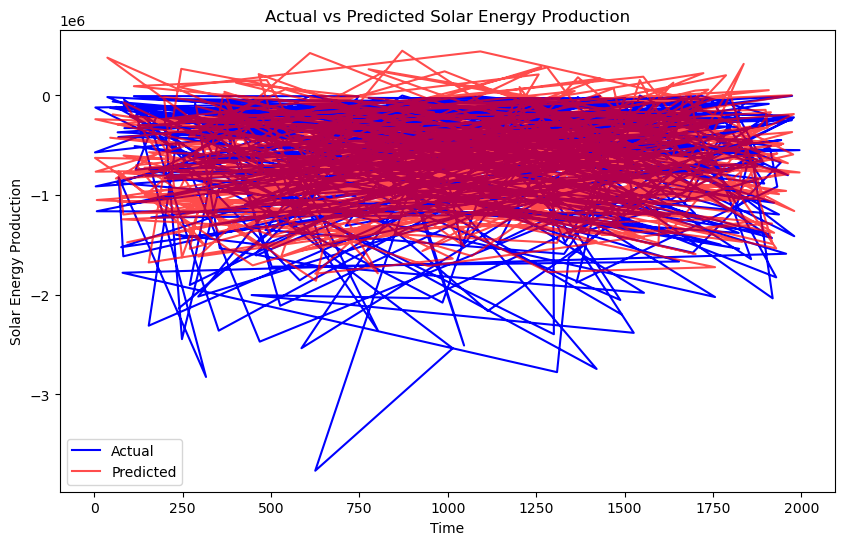

In [29]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, test_prediction, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Solar Energy Production')
plt.title('Actual vs Predicted Solar Energy Production')
plt.legend()
plt.show()

# manual testing

In [33]:
# Manually create new data for prediction
new_data = {
    'Solar irradiance': 800,  # Replace with the actual value
    'Temperature': 25,  # Replace with the actual value
    'Solar panel efficiency': 15,  # Replace with the actual value
    'hour_of_day': 14,  # Replace with the hour you want to predict
    'day_of_year': 200,  # Replace with the day of the year you want to predict
    'day_of_week': 2  # Replace with the day of the week (0 for Monday, 1 for Tuesday, etc.)
}

# Convert the manually created data into a DataFrame
new_df = pd.DataFrame([new_data])

# Use the trained model to predict solar energy production for the new data
predicted_energy = model.predict(new_df)
print(f"Predicted Solar Energy Production: {predicted_energy[0]}")


Predicted Solar Energy Production: -344991.6269608026
